## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math

There are 2 csv files in the current version of the dataset:


In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = math.ceil(nCol / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis="columns") # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr(numeric_only=True)
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis="columns")
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: /kaggle/input/AppleWatch - HeartRate StepCount etc 8440 rows - analysis.csv

In [6]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# AppleWatch - HeartRate StepCount etc 8440 rows - analysis.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./input/AppleWatch - HeartRate StepCount etc 8440 rows - analysis.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'AppleWatch - HeartRate StepCount etc 8440 rows - analysis.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 7 columns


Let's take a quick look at what the data looks like:

In [7]:
df1.head(5)

,Unnamed: 0,type,unit,creationDate,startDate,endDate,value
0,2,HKQuantityTypeIdentifierHeartRate,count/min,2020-06-13 02:50:42 +0900,2020-06-13 02:50:23 +0900,2020-06-13 02:50:23 +0900,79.5536
1,3,HKQuantityTypeIdentifierHeartRate,count/min,2020-06-13 02:55:24 +0900,2020-06-13 02:55:10 +0900,2020-06-13 02:55:10 +0900,81.0000
2,4,HKQuantityTypeIdentifierHeartRate,count/min,2020-06-13 03:01:15 +0900,2020-06-13 02:57:08 +0900,2020-06-13 02:57:08 +0900,85.0000
3,5,HKQuantityTypeIdentifierHeartRate,count/min,2020-06-13 03:06:23 +0900,2020-06-13 03:02:43 +0900,2020-06-13 03:02:43 +0900,89.0000
4,6,HKQuantityTypeIdentifierHeartRate,count/min,2020-06-13 03:12:22 +0900,2020-06-13 03:08:34 +0900,2020-06-13 03:08:34 +0900,89.0000


Distribution graphs (histogram/bar graph) of sampled columns:

In [8]:
plotPerColumnDistribution(df1, 10, 5)

<Figure size 2400x0 with 0 Axes>

Correlation matrix:

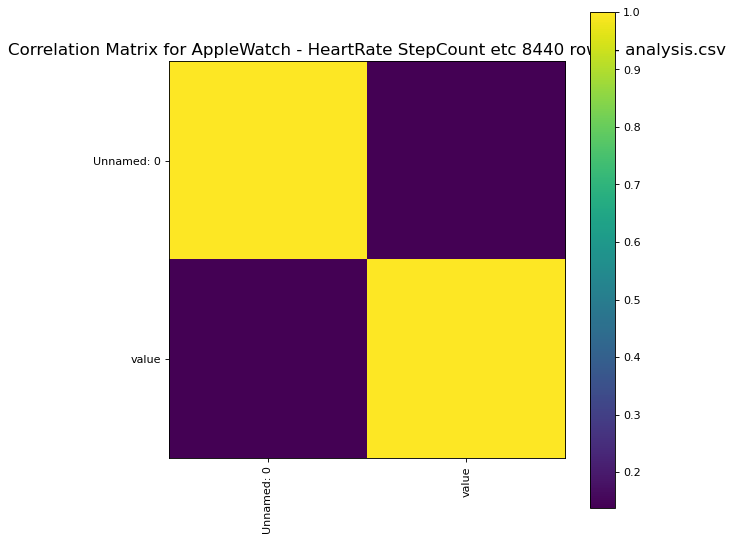

In [9]:
plotCorrelationMatrix(df1, 8)

### Let's check 2nd file: /kaggle/input/AppleWatch - HeartRate StepCount etc 92406 rows - export20200620105726.csv

In [10]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# AppleWatch - HeartRate StepCount etc 92406 rows - export20200620105726.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('./input/AppleWatch - HeartRate StepCount etc 92406 rows - export20200620105726.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'AppleWatch - HeartRate StepCount etc 92406 rows - export20200620105726.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


Let's take a quick look at what the data looks like:

In [11]:
df2.head(5)

,type,sourceName,sourceVersion,unit,creationDate,startDate,endDate,value
0,HKQuantityTypeIdentifierHeight,ヘルスケア,10.1.1,cm,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,183.0000
1,HKQuantityTypeIdentifierBodyMass,ヘルスケア,10.1.1,kg,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,2016-12-25 13:07:19 +0900,85.0000
2,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 02:50:42 +0900,2020-06-13 02:50:23 +0900,2020-06-13 02:50:23 +0900,79.5536
3,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 02:55:24 +0900,2020-06-13 02:55:10 +0900,2020-06-13 02:55:10 +0900,81.0000
4,HKQuantityTypeIdentifierHeartRate,石井大輔のApple Watch,6.1.3,count/min,2020-06-13 03:01:15 +0900,2020-06-13 02:57:08 +0900,2020-06-13 02:57:08 +0900,85.0000


Distribution graphs (histogram/bar graph) of sampled columns:

/tmp/ipykernel_282122/2869905496.py:20: UserWarning: Glyph 30707 (\N{CJK UNIFIED IDEOGRAPH-77F3}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
/tmp/ipykernel_282122/2869905496.py:20: UserWarning: Glyph 20117 (\N{CJK UNIFIED IDEOGRAPH-4E95}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
/tmp/ipykernel_282122/2869905496.py:20: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
/tmp/ipykernel_282122/2869905496.py:20: UserWarning: Glyph 36628 (\N{CJK UNIFIED IDEOGRAPH-8F14}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
/tmp/ipykernel_282122/2869905496.py:20: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
/tmp/ipykernel_282122/2869905496.py:20: UserWarning: Glyph 12504 (\N

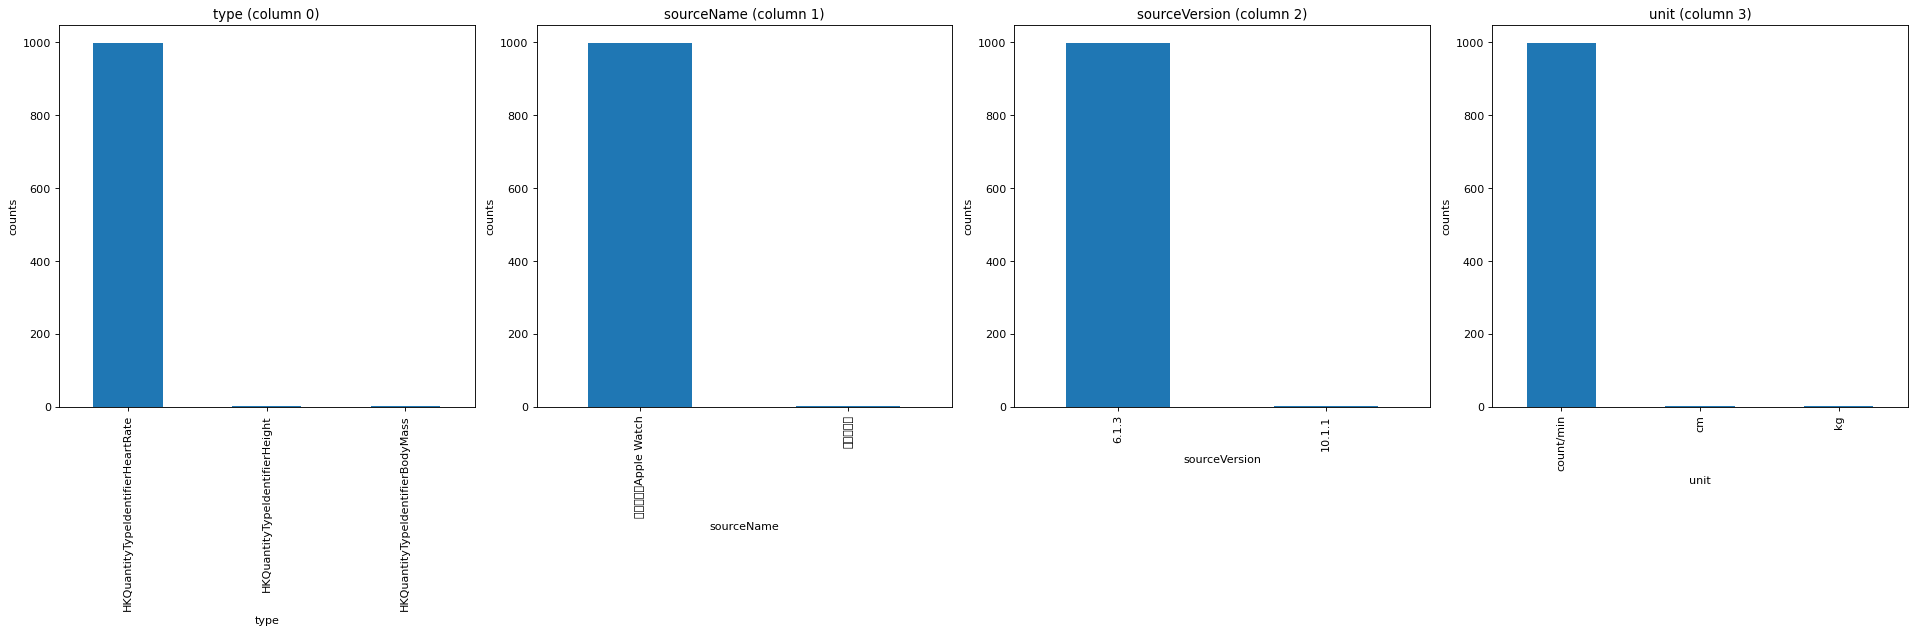

In [12]:
plotPerColumnDistribution(df2, 10, 5)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!